In [17]:
# Tratamiento de datos
# ------------------------------------------------------------------------------
import numpy as np
import pandas as pd# Gráficos
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns# Modelado y evaluación
# ------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score , cohen_kappa_score, roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV# Configuración warnings
# ------------------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')

Hasta ahora hemos ajustado el modelo usando una Regresión Logística, pero como hemos aprendido, podemos usar el Decision Tree en este tipo de problemas. Los objetivos de este pair programming :

>Ajustad un modelo de Decision Tree a nuestros datos.

>Calculad las métricas a nuestro nuevo modelo.

>Comparad las métricas con el modelo hecho hasta ahora. ¿Cuál es mejor?

In [3]:
df=pd.read_csv('./datos/books_prepr_datos.csv', index_col=0)

In [4]:
#MODELO DECISSION TREE

X = df.drop("genre", axis = 1)
y = df["genre"]


In [6]:

# y dividir nuestros datos en train y test para poder evaluar la bondad de nuestro modelo

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


In [7]:
# creamos el objeto del modelo
arbol = DecisionTreeRegressor(random_state =42)  #Como no sabemos la profundidad adecuada, 
                    #dejamos que le modelo lo haga con todas las variables y más adelante, elegiremos la que mejor ha predicho los datos.


In [8]:
# ajustamos el modelo
arbol.fit(x_train, y_train)


DecisionTreeRegressor(random_state=42)

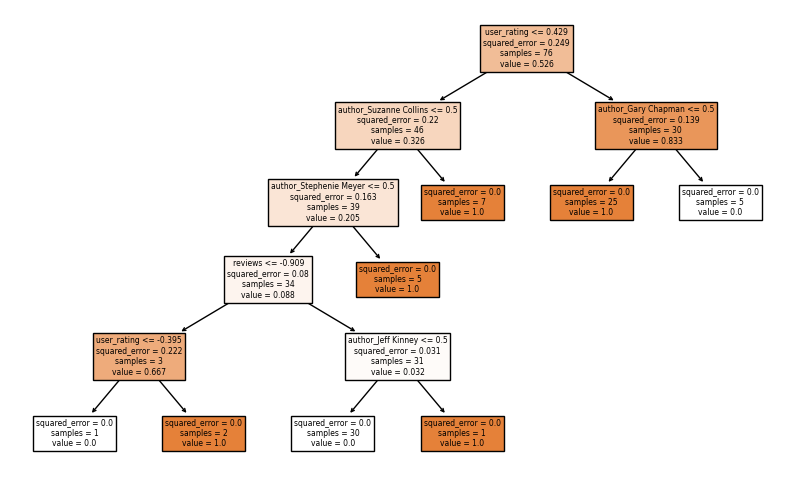

In [9]:
#Para mostrar el modelo en árbol
fig = plt.figure(figsize = (10,6))  
tree.plot_tree(arbol, feature_names = x_train.columns, filled = True)
plt.show();


In [10]:
#HIPER-PARÁMETROS

# max features. Como vemos, debemos poner en nuestro modelo una profudidad máxima de 4. 

max_features = np.sqrt(len(x_train.columns))
max_features


3.7416573867739413

In [11]:

# max depth compruebo
print(arbol.tree_.max_depth)


5


In [12]:
# hacemos las predicciones sobre los dos set de datos el X_test y el X_train

y_pred_test_dt = arbol.predict(x_test)
y_pred_train_dt = arbol.predict(x_train)


>- Extraer las métricas

In [19]:
def metricas(clases_reales_test, clases_predichas_test, clases_reales_train, clases_predichas_train, modelo):   
     # para el test
    accuracy_test = accuracy_score(clases_reales_test, clases_predichas_test)
    precision_test = precision_score(clases_reales_test, clases_predichas_test)
    recall_test = recall_score(clases_reales_test, clases_predichas_test)
    f1_test = f1_score(clases_reales_test, clases_predichas_test)
    kappa_test = cohen_kappa_score(clases_reales_test, clases_predichas_test)    
    # para el train
    accuracy_train = accuracy_score(clases_reales_train, clases_predichas_train)
    precision_train = precision_score(clases_reales_train, clases_predichas_train)
    recall_train = recall_score(clases_reales_train, clases_predichas_train)
    f1_train = f1_score(clases_reales_train, clases_predichas_train)
    kappa_train = cohen_kappa_score(clases_reales_train, clases_predichas_train)    
    
    df = pd.DataFrame({'accuracy': [accuracy_test, accuracy_train],
                       'precision': [precision_test, precision_train],
                       'recall': [recall_test, recall_train],
                       'f1': [f1_test, f1_train],
                       'kapppa': [kappa_test, kappa_train],
                       'set': ['test', 'train']})    
    df['modelo'] = modelo
    return df

In [23]:

# sacamos las métricas para ver si hay overfitting o underfitting, para modificar la profundidad en función de estos resultados

dt_results1 = metricas(y_test,y_pred_test_dt, y_train, y_pred_train_dt, "Decission Tree I")
dt_results1.head()


,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.947368,1.0,0.9,0.947368,0.895028,test,Decission Tree I
1,1.000000,1.0,1.0,1.000000,1.000000,train,Decission Tree I


In [24]:
# MODELO II DECISION TREE PARA ESTABLECER LA PROFUNDIDAD DEL PROPIO MODELO

# lo primero que tenemos que hacer es definir un diccionario con los hiperparámetros que queremos modificar 
# y los valores que queremos 

param = {"max_depth": [2,3,5], # teniendo en cuenta que teníamos overfitting tendremos que reducir la profundidad del modelo, 
                                #la nuestra anterior era de 17. Bajaremos mucho este valor ya que teníamos un overfitting muy claro
        "max_features": [1,2,3,4],# calculamos en celdas anteriores, probaremos a hacer el modelo como una variable, 2, 3 y 4. 
                                #Ponemos como límite el 4 ya que es el resultado de la raiz cuadrada. 

        # estos dos hiperparámetros son más difíciles de definir, pero usualmente se suelen elegir los siguientes valores
        "min_samples_split": [10, 50, 100],
        "min_samples_leaf": [10,50,100]} 


In [25]:
# una vez creado el diccionario iniciaremos el modelo con GridSearch

gs = GridSearchCV(
            estimator=DecisionTreeClassifier(random_state=42), # tipo de modelo que queremos hacer
            param_grid= param, # que hiperparámetros queremos que testee
            cv=10,  
            verbose=-1) # para que no nos printee ningún mensaje en pantalla


In [26]:
# ajustamos el modelo que acabamos de definir en el GridSearch

gs.fit(x_train, y_train)


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [2, 3, 5], 'max_features': [1, 2, 3, 4],
                         'min_samples_leaf': [10, 50, 100],
                         'min_samples_split': [10, 50, 100]},
             verbose=-1)

In [27]:

# este método (BEST_ESTIMATOR) nos esta diciendo que el mejor modelo es aquel que tiene una profundidad de 6, que usa 4 
# variables predictoras para construir el modelo y que tiene  un min_samples_leaf y un min_samples_split de 10. 
mejor_modelo = gs.best_estimator_
mejor_modelo

DecisionTreeClassifier(max_depth=3, max_features=3, min_samples_leaf=10,
                       min_samples_split=10, random_state=42)

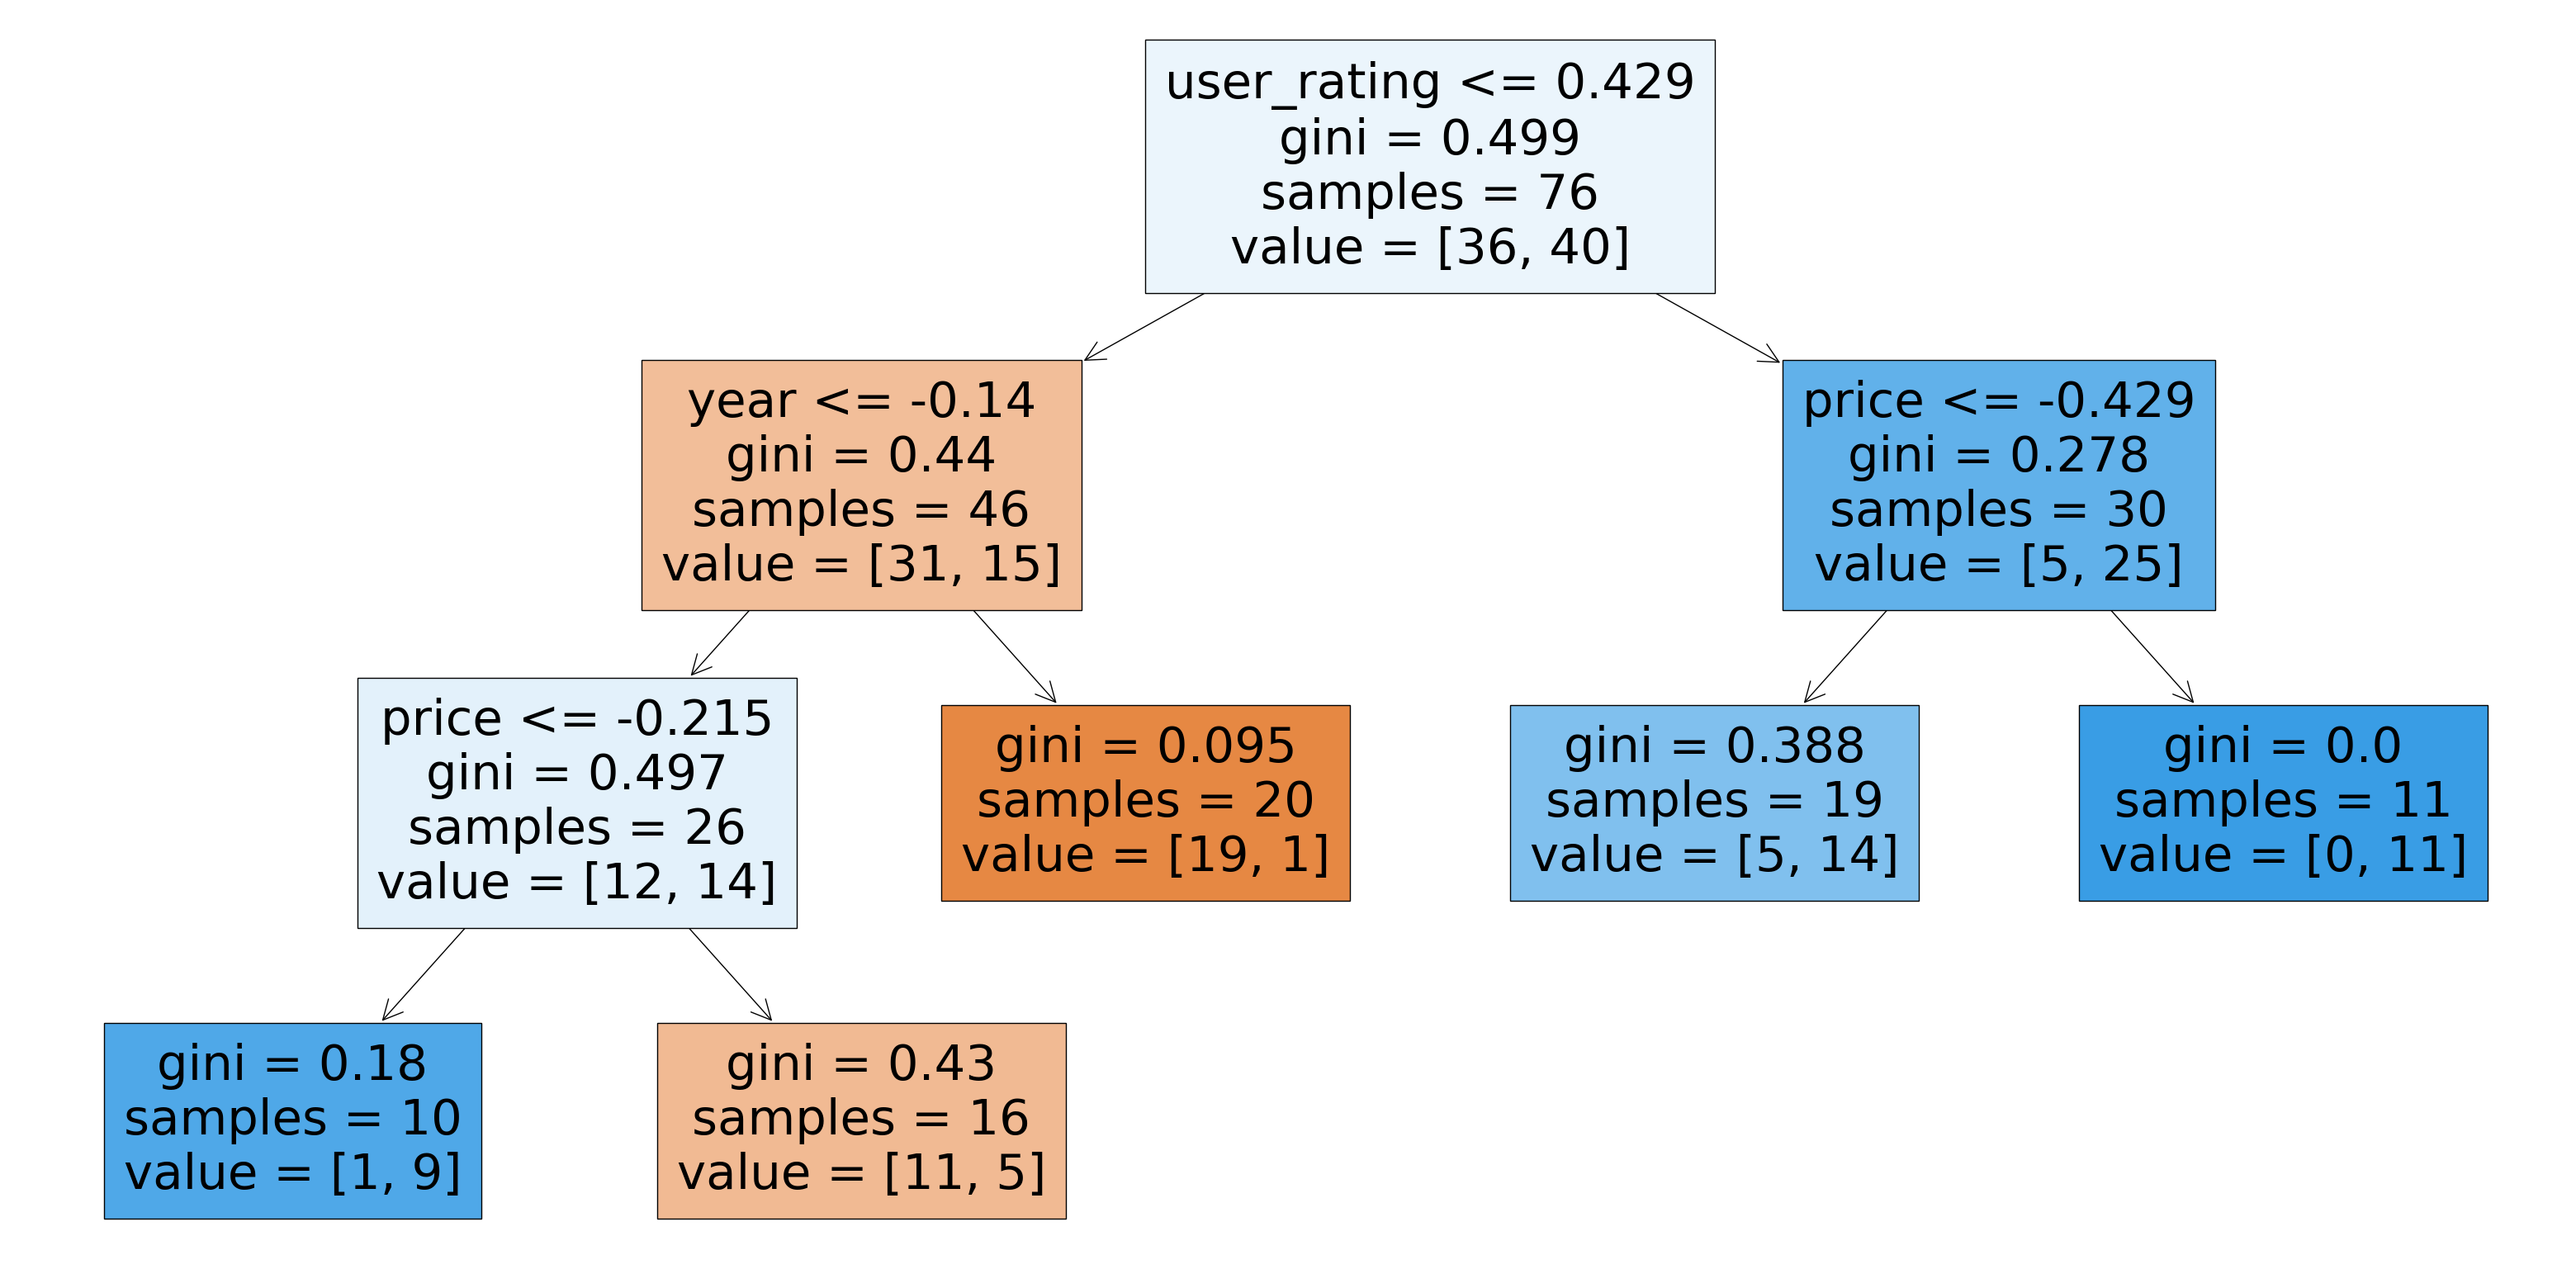

In [28]:

# veamos ahora que pinta tiene nuestro árbol

fig = plt.figure(figsize=(40, 20))
tree.plot_tree(mejor_modelo, feature_names=x_train.columns, filled=True);

In [29]:
#MÉTRICAS PARA COMPROBAR LA CALIDAD DEL MODELO

y_pred_test_dt2 = mejor_modelo.predict(x_test)
y_pred_train_dt2 = mejor_modelo.predict(x_train)


In [32]:

dt_results2 = metricas(y_test, y_pred_test_dt2 ,y_train, y_pred_train_dt2, "Decision tree II")
dt_results2


,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.842105,1.00,0.70,0.823529,0.688525,test,Decision tree II
1,0.842105,0.85,0.85,0.850000,0.683333,train,Decision tree II


In [33]:

# vamos  a juntar los dataframes de los resultados de los modelos para poder compararlos mejor

df_decision_results = pd.concat([dt_results1, dt_results2], axis = 0)
df_decision_results


,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.947368,1.00,0.90,0.947368,0.895028,test,Decission Tree I
1,1.000000,1.00,1.00,1.000000,1.000000,train,Decission Tree I
0,0.842105,1.00,0.70,0.823529,0.688525,test,Decision tree II
1,0.842105,0.85,0.85,0.850000,0.683333,train,Decision tree II


In [37]:

# Abrimos el csv con nuestros resultado de LR para así comprobar el mejor modelo

df_logistic_results = pd.read_csv("datos/books_log_reg.csv", index_col = 0)


In [38]:
df_logistic_results.head()

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.947368,1.0,0.9,0.947368,0.895028,test,Regresión logistica Esta
1,1.000000,1.0,1.0,1.000000,1.000000,train,Regresión logistica Esta


In [41]:

# concatenamos todos los resultados

df_DT_LR_results = pd.concat([df_logistic_results, df_decision_results], axis = 0)
df_DT_LR_results.reset_index(inplace=True)

In [44]:
df_DT_LR_results

,index,accuracy,precision,recall,f1,kapppa,set,modelo
0,0,0.947368,1.00,0.90,0.947368,0.895028,test,Regresión logistica Esta
1,1,1.000000,1.00,1.00,1.000000,1.000000,train,Regresión logistica Esta
2,0,0.947368,1.00,0.90,0.947368,0.895028,test,Decission Tree I
3,1,1.000000,1.00,1.00,1.000000,1.000000,train,Decission Tree I
4,0,0.842105,1.00,0.70,0.823529,0.688525,test,Decision tree II
5,1,0.842105,0.85,0.85,0.850000,0.683333,train,Decision tree II


> Como hemos visto que de todos los modelos el Decision Tree II es el menos fiable decidimos obviarlo.

In [45]:
df_DT_LR_results.drop([4,5], axis = 0, inplace = True)
df_DT_LR_results


,index,accuracy,precision,recall,f1,kapppa,set,modelo
0,0,0.947368,1.0,0.9,0.947368,0.895028,test,Regresión logistica Esta
1,1,1.000000,1.0,1.0,1.000000,1.000000,train,Regresión logistica Esta
2,0,0.947368,1.0,0.9,0.947368,0.895028,test,Decission Tree I
3,1,1.000000,1.0,1.0,1.000000,1.000000,train,Decission Tree I


In [48]:
# pongamos un poco de color a nuestro dataframe para ver la comparación de los datos de una forma un poco más amigable. 
df_DT_LR_results.style.background_gradient(cmap='seismic')

,index,accuracy,precision,recall,f1,kapppa,set,modelo
0,0,0.947368,1.000000,0.900000,0.947368,0.895028,test,Regresión logistica Esta
1,1,1.000000,1.000000,1.000000,1.000000,1.000000,train,Regresión logistica Esta
2,0,0.947368,1.000000,0.900000,0.947368,0.895028,test,Decission Tree I
3,1,1.000000,1.000000,1.000000,1.000000,1.000000,train,Decission Tree I


In [49]:
df_DT_LR_results.to_csv('./Datos/books_todos_resultados_LR_DT.csv')

In [50]:
# COMPROBACIÓN DE LA IMPORTANCIA DE VARIABLES PREDICTORAS

# vamos a crearnos un dataframe 
importancia_predictores = pd.DataFrame(
                            {'predictor': x_train.columns,
                             'importancia': mejor_modelo.feature_importances_}
                            )


In [51]:

# ordenamos de mayor a menor los resultados
importancia_predictores.sort_values(by=["importancia"], ascending=False, inplace = True)


In [52]:

# printeamos los resultados
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_predictores


Importancia de los predictores en el modelo
-------------------------------------------


,predictor,importancia
0,user_rating,0.468341
3,year,0.270374
2,price,0.261285
1,reviews,0.000000
4,author_American Psychological Association,0.000000
5,author_Dr. Seuss,0.000000
6,author_Gallup,0.000000
7,author_Gary Chapman,0.000000
8,author_Jeff Kinney,0.000000
9,author_Rick Riordan,0.000000


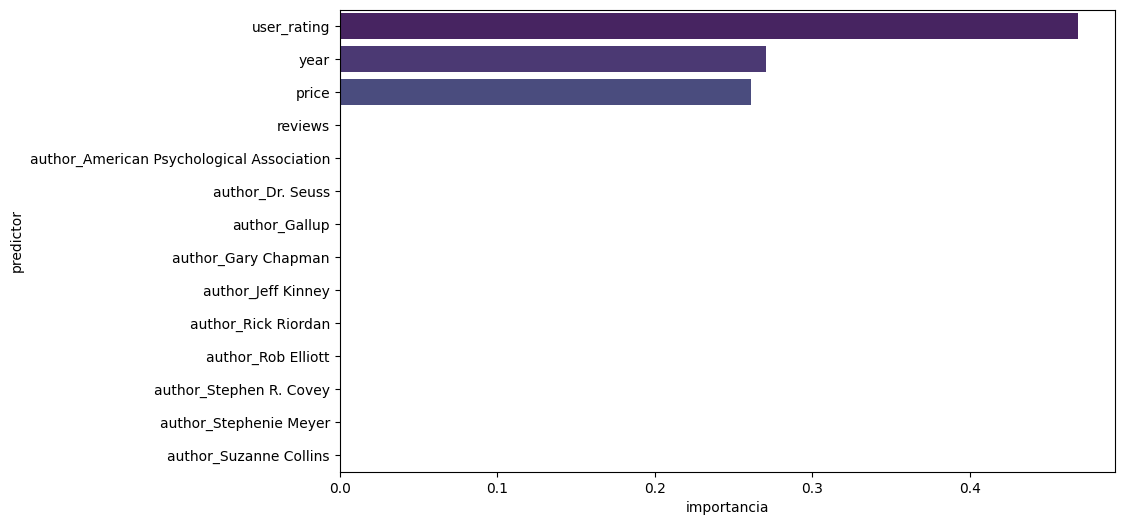

In [53]:

# por último ploteamos los resultados para verlo de una forma más amigable. 

plt.figure(figsize=(10,6))
sns.barplot(x = "importancia", y = "predictor", data = importancia_predictores, palette="viridis");
plt.show()

In [60]:
# lo primero que hacemos es crearnos un dataframe con los valores solo de adulto, es decir, la primera y antepenúltima fila
author = importancia_predictores.iloc[4::]
author

,predictor,importancia
4,author_American Psychological Association,0.0
5,author_Dr. Seuss,0.0
6,author_Gallup,0.0
7,author_Gary Chapman,0.0
8,author_Jeff Kinney,0.0
9,author_Rick Riordan,0.0
10,author_Rob Elliott,0.0
11,author_Stephen R. Covey,0.0
12,author_Stephenie Meyer,0.0
13,author_Suzanne Collins,0.0


In [61]:
# eliminamos esas filas del dataframe donde tenemos los valores de importancia

importancia_predictores.drop(author.index, inplace = True)


In [63]:
# nos creamos nuevas filas con el resultado de la suma

importancia_predictores.loc[5] =  ['author', author['importancia'].sum()]


In [64]:
# ordenamos el df

importancia_predictores.sort_values(by = "importancia", ascending = False, inplace = True)
importancia_predictores


,predictor,importancia
0,user_rating,0.468341
3,year,0.270374
2,price,0.261285
1,reviews,0.000000
5,author,0.000000


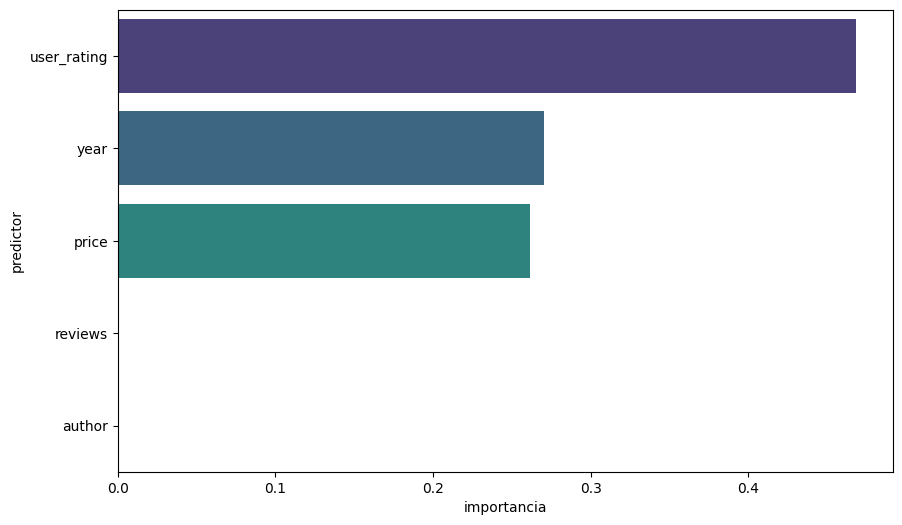

In [65]:
# por último ploteamos los resultados para verlo de una forma más amigable. 

plt.figure(figsize=(10,6))
sns.barplot(x = "importancia", y = "predictor", data = importancia_predictores, palette="viridis");
plt.show()


>- Debatid entre vosotras que modelo es mejor y por qué (basándose en las métricas)

- Hemos podido observar que los modelos Decision Tree I y Logistic Regression nos daban los mismos resultados por lo que nos es indiferente elegir uno u otro como mejor modelo. Nos ha llamado la atención que la variable 'Author' careciese de importancia dado que pensabamos que seria clave a la hora de predecir nuestra variable respuesta 'género'.